## Natural Language Proccessing

In [4]:
import tensorflow as tf

In [5]:
import tensorflow_datasets as tfds

### IMDB Dataset

In [6]:
imbd_sentences = []
imbd_layers = []

In [7]:
train_data = tfds.as_numpy(tfds.load
                           ('imdb_reviews', 
                            split='train'))

2024-02-07 15:41:31.421716: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-02-07 15:41:31.421767: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-02-07 15:41:31.421822: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (elimson-HP-250-G7-Notebook-PC): /proc/driver/nvidia/version does not exist
2024-02-07 15:41:31.502192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
train_data

In [9]:
for item in train_data:
    imbd_sentences.append(str(item['text']))
    imbd_layers.append(item['label'])    

In [10]:
len(imbd_sentences)

25000

In [8]:
imbd_sentences[25]

'b"Well, i rented this movie and found out it realllllllly sucks. It is about that family with the stepmother and the same stupid fights in the family,then the cool son comes with his stupid camera and he likes to take a photo to damaged building and weird things and weird movie ,and then he asks his father to take him to a side trip and simply agrees, etc etc etc..... They go to that town which no one know it exists (blah blah blah) And the most annoying thing is that the movie ends and yet you don\'t understand what is THAT MOVIE!!!!I have seen many mystery movies but that was the worst, Honestly it doesn\'t have a description at all and i wish i didn\'t see it."'

In [9]:
imbd_layers[25]

0

In [11]:
training_sentences = imbd_sentences[:20000]
test_sentences = imbd_sentences[20000:]

training_labels = imbd_layers[:20000]
test_labels = imbd_layers[20000:]

In [12]:
len(training_sentences), len(test_sentences)

(20000, 5000)

### Tokenisation

In [17]:
phrase = "Je suis au marché"

In [18]:
phrase.split(" ")

['Je', 'suis', 'au', 'marché']

In [1]:
phrases = ["Je suis au marché", "Je travaille au marché"]

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
len(phrases)

2

In [14]:
tokenizer = Tokenizer()

In [23]:
tokenizer.fit_on_texts(phrases)

In [24]:
tokenizer.word_index

{'je': 1, 'au': 2, 'marché': 3, 'suis': 4, 'travaille': 5}

In [25]:
tokenizer.index_word

{1: 'je', 2: 'au', 3: 'marché', 4: 'suis', 5: 'travaille'}

In [26]:
tokenizer.texts_to_sequences(phrases)

[[1, 4, 2, 3], [1, 5, 2, 3]]

In [27]:
test = ["Je vends au marché"]

In [28]:
tokenizer.texts_to_sequences(test) # Absence de vend

[[1, 2, 3]]

In [31]:
tokenizer = Tokenizer(num_words=100,
                     oov_token="<OOV>") # Out of vocabulary
tokenizer.fit_on_texts(phrases)

In [32]:
tokenizer.word_index

{'<OOV>': 1, 'je': 2, 'au': 3, 'marché': 4, 'suis': 5, 'travaille': 6}

In [33]:
tokenizer.texts_to_sequences(test) # Présence de vend

[[2, 1, 3, 4]]

### Padding

In [34]:
phrases = ["Je suis au marché",
          "Je travaille au marché",
          "es-tu rentré du marché",
          "Je nettoie le marché tous les jours avant de commencer  vendre la matin"]

tokenizer = Tokenizer(num_words=100,
                     oov_token="<OOV>") # Out of vocabulary
tokenizer.fit_on_texts(phrases)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(phrases)

In [35]:
sequences

[[3, 5, 4, 2],
 [3, 6, 4, 2],
 [7, 8, 9, 10, 2],
 [3, 11, 12, 2, 13, 14, 15, 16, 17, 18, 19, 20, 21]]

In [36]:
word_index

{'<OOV>': 1,
 'marché': 2,
 'je': 3,
 'au': 4,
 'suis': 5,
 'travaille': 6,
 'es': 7,
 'tu': 8,
 'rentré': 9,
 'du': 10,
 'nettoie': 11,
 'le': 12,
 'tous': 13,
 'les': 14,
 'jours': 15,
 'avant': 16,
 'de': 17,
 'commencer': 18,
 'vendre': 19,
 'la': 20,
 'matin': 21}

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
sequences

[[3, 5, 4, 2],
 [3, 6, 4, 2],
 [7, 8, 9, 10, 2],
 [3, 11, 12, 2, 13, 14, 15, 16, 17, 18, 19, 20, 21]]

In [39]:
pad_sequences(sequences)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  5,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  6,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  7,  8,  9, 10,  2],
       [ 3, 11, 12,  2, 13, 14, 15, 16, 17, 18, 19, 20, 21]], dtype=int32)

In [40]:
pad_sequences(sequences, padding="post")

array([[ 3,  5,  4,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  6,  4,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  8,  9, 10,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 11, 12,  2, 13, 14, 15, 16, 17, 18, 19, 20, 21]], dtype=int32)

In [41]:
pad_sequences(sequences, padding="post", maxlen=7)

array([[ 3,  5,  4,  2,  0,  0,  0],
       [ 3,  6,  4,  2,  0,  0,  0],
       [ 7,  8,  9, 10,  2,  0,  0],
       [15, 16, 17, 18, 19, 20, 21]], dtype=int32)

In [43]:
pad_sequences(sequences, 
              padding="post", 
              maxlen=7,
             truncating="post")

array([[ 3,  5,  4,  2,  0,  0,  0],
       [ 3,  6,  4,  2,  0,  0,  0],
       [ 7,  8,  9, 10,  2,  0,  0],
       [ 3, 11, 12,  2, 13, 14, 15]], dtype=int32)

### Stop words (enlever les mots qui ne portent pas le sens de la phrase)

In [44]:
phrase = "Je vais au Marché le Jeudi"

In [45]:
stop_words = ['au', 'le']

In [46]:
words = phrase.split(" ")
phrase_nettoye = []

for word in words:
    if word not in stop_words:
        phrase_nettoye.append(word)

In [47]:
phrase_nettoye

['Je', 'vais', 'Marché', 'Jeudi']

In [48]:
" ".join(phrase_nettoye)

'Je vais Marché Jeudi'

In [49]:
# Package NLTK

### Enbedding (longement)

In [15]:
training_sentences[42]

'b\'One of the weaker Carry On adventures sees Sid James as the head of a crime gang stealing contraceptive pills. The fourth of the series to be hospital-based, it\\\'s possibly the least of the genre. There\\\'s a curiously flat feel throughout, with all seemingly squandered on below-par material. This is far from the late-70s nadir, but Williams, James, Bresslaw, Maynard et al. are all class performers yet not given the backing of a script equal to their ability.<br /><br />Most of the gags are onrunning, rather than episodic as Carry Ons usually are. So that instead of the traditional hit and miss ratio, if you don\\\'t find the joke funny in the first place you\\\'re stuck with it for most of the film. These continuous plot strands include Williams \\xc2\\x96 for no good reason \\xc2\\x96 worrying that he\\\'s changing sex, and Kenneth Cope in drag. Like the stagy physical pratt falls, the whole thing feels more contrived than in other movies, and lacking in cast interest. Continu

In [16]:
training_labels[42]

0

In [15]:
tokenizer = Tokenizer(num_words=20000, # Seul les 20000 mots les plus fréquents seront pris
                     oov_token="<OOV>")

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sentences = tokenizer.texts_to_sequences(training_sentences)
test_sentences = tokenizer.texts_to_sequences(test_sentences)

training_padd = pad_sequences(training_sentences, 
              padding="post", 
              maxlen=15,
             truncating="post")
test_padd = pad_sequences(test_sentences, 
              padding="post", 
              maxlen=15,
             truncating="post")

In [16]:
len(tokenizer.word_index)

78371

In [16]:
training_padd[42]

array([4668,    5,    2, 5838, 1706,   22, 2438, 1117, 5099,  594,   15,
          2,  423,    5,    4], dtype=int32)

In [17]:
import numpy as np


In [18]:

training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

In [18]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(20000, 20),  # Attribuer 20 poids(caractéristiques(nombres)) à chacun des 20000 mots
        tf.keras.layers.GlobalAveragePooling1D(), # La moyenne pour chaque phrase
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        
    ]
)

In [19]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model2.h5", 
                            # save_weights_only=True, 
                            monitor="val_accuracy", 
                            mode="max", 
                            save_best_only=True)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                       patience=3
                                       ) 

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          400000    
                                                                 
 global_average_pooling1d (G  (None, 20)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 400,177
Trainable params: 400,177
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

h = model.fit(training_padd, training_labels, epochs=50, 
              validation_data=(test_padd, test_labels),
             callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 6s 9ms/step - loss: 0.6423 - accuracy: 0.6392 - val_loss: 0.5879 - val_accuracy: 0.6848
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 0.5027 - accuracy: 0.7591 - val_loss: 0.5759 - val_accuracy: 0.6990
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 0.4226 - accuracy: 0.8091 - val_loss: 0.6088 - val_accuracy: 0.6958
Epoch 4/50
625/625 [==============================] - 5s 8ms/step - loss: 0.3717 - accuracy: 0.8378 - val_loss: 0.6572 - val_accuracy: 0.6910
Epoch 5/50
625/625 [==============================] - 5s 8ms/step - loss: 0.3359 - accuracy: 0.8569 - val_loss: 0.6983 - val_accuracy: 0.6864
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 0.3086 - accuracy: 0.8697 - val_loss: 0.7361 - val_accuracy: 0.6876
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2880 - accuracy: 0.8780 - val_loss: 0.7833 - val_accuracy: 0.6822
Epoch 

In [17]:
import matplotlib.pyplot as plt

def plot_grah(history, string):    
    plt.plot((history.history[string]))
    plt.plot((history.history["val_" + string]))    
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, "val_" + string])
    plt.title("Learning Curve")
    plt.show()

In [ ]:
plot_grah(h, 'accuracy')
plot_grah(h, 'loss')

# Avec le graphe on le verra mieux mais là on a un overfitting très grave
# loss: 0.0312 - accuracy: 0.9911 - val_loss: 4.4471 - val_accuracy: 0.6430

In [ ]:
tf.keras.layers.Embedding(20000, 20)

### Vocab Size

In [19]:
# 20000

vocab_size = 1 # On risque de n'avoir que des 00V

vocab_size = len(word_index) # On risque d'avoir un vocab de mot trop grand, le risque est qu'on apprenne des mots unitiles qui n'apparaisse qu'une fois

# Plus on a de parametre plus il nous faut des données pour l'entrainement

In [24]:
# Trouvons un compromis
wc = tokenizer.word_counts # le nombre d'occurence de chaque mot

In [25]:
wc

OrderedDict([('b', 10166),
             ('this', 59436),
             ('was', 38653),
             ('an', 17004),
             ('absolutely', 1178),
             ('terrible', 1343),
             ('movie', 35122),
             ("don't", 3111),
             ('be', 21599),
             ('lured', 24),
             ('in', 74997),
             ('by', 17963),
             ('christopher', 329),
             ('walken', 87),
             ('or', 14368),
             ('michael', 998),
             ('ironside', 21),
             ('both', 2715),
             ('are', 23512),
             ('great', 7184),
             ('actors', 3584),
             ('but', 34025),
             ('must', 2570),
             ('simply', 1569),
             ('their', 9139),
             ('worst', 2183),
             ('role', 2540),
             ('history', 1078),
             ('even', 10048),
             ('acting', 5165),
             ('could', 6274),
             ('not', 24437),
             ('redeem', 54),
             

In [26]:
wc = sorted(wc.items(), key=lambda t:t[1], reverse=True)

In [27]:
wc

[('the', 268774),
 ('and', 131448),
 ('a', 130000),
 ('of', 116684),
 ('to', 108554),
 ('is', 85766),
 ('br', 81558),
 ('in', 74997),
 ('it', 70853),
 ('i', 64485),
 ('this', 59436),
 ('that', 57525),
 ('was', 38653),
 ('as', 37339),
 ('for', 35484),
 ('with', 35300),
 ('movie', 35122),
 ('but', 34025),
 ('film', 31777),
 ("'s", 29841),
 ('on', 27414),
 ('you', 25738),
 ('not', 24437),
 ('his', 23600),
 ('are', 23512),
 ('he', 22993),
 ('have', 22341),
 ('be', 21599),
 ('one', 21227),
 ('all', 19226),
 ('at', 18965),
 ('by', 17963),
 ('they', 17778),
 ('an', 17004),
 ('who', 16858),
 ('so', 16503),
 ('from', 16324),
 ('like', 16250),
 ("'t", 14730),
 ('her', 14692),
 ('or', 14368),
 ('just', 14078),
 ('there', 14065),
 ('about', 13835),
 ('out', 13756),
 ("'", 13668),
 ('if', 13352),
 ('has', 13350),
 ('what', 12661),
 ('some', 12571),
 ('good', 12050),
 ('more', 11298),
 ('very', 11296),
 ('when', 11160),
 ('she', 10912),
 ('can', 10590),
 ('up', 10583),
 ('time', 10188),
 ('b', 10166

In [25]:
import pandas as pd

In [26]:
df = pd.DataFrame(wc, columns=["mots", "frequence"])

In [27]:
df[df["frequence"] > 5]

,mots,frequence
0,the,268774
1,and,131448
2,a,130000
3,of,116684
4,to,108554
...,...,...
24429,dornhelm,6
24430,donnison,6
24431,cray,6
24432,morand,6


In [32]:
test_tok = Tokenizer()
test_tok.fit_on_texts(test_sentences)

In [34]:
test_word = test_tok.word_index.keys()

In [36]:
train_word = df["mots"].tolist()

In [37]:
len(train_word)

78370

In [40]:
inter = set(train_word).intersection(test_word)

In [41]:
len(inter)

33879

In [15]:
vocab_size = 29000

In [15]:
tokenizer = Tokenizer(num_words=vocab_size, 
                     oov_token="<OOV>")

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sentences = tokenizer.texts_to_sequences(training_sentences)
test_sentences = tokenizer.texts_to_sequences(test_sentences)

training_padd = pad_sequences(training_sentences, 
              padding="post", 
              maxlen=15,
             truncating="post")
test_padd = pad_sequences(test_sentences, 
              padding="post", 
              maxlen=15,
             truncating="post")

In [16]:
import numpy as np

training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

In [17]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, 20),  # Attribuer 20 poids(caractéristiques(nombres)) à chacun des 20000 mots
        tf.keras.layers.GlobalAveragePooling1D(), # La moyenne pour chaque phrase
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        
    ]
)

model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model2.h5", 
                            # save_weights_only=True, 
                            monitor="val_accuracy", 
                            mode="max", 
                            save_best_only=True)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                       patience=3
                                       ) 

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

h = model.fit(training_padd, training_labels, epochs=50, 
              validation_data=(test_padd, test_labels),
             callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 10s 12ms/step - loss: 0.6493 - accuracy: 0.6252 - val_loss: 0.5910 - val_accuracy: 0.6842
Epoch 2/50
625/625 [==============================] - 9s 14ms/step - loss: 0.5023 - accuracy: 0.7620 - val_loss: 0.5783 - val_accuracy: 0.7010
Epoch 3/50
625/625 [==============================] - 9s 14ms/step - loss: 0.4138 - accuracy: 0.8140 - val_loss: 0.6106 - val_accuracy: 0.6954
Epoch 4/50
625/625 [==============================] - 10s 16ms/step - loss: 0.3569 - accuracy: 0.8451 - val_loss: 0.6540 - val_accuracy: 0.6882
Epoch 5/50
625/625 [==============================] - 9s 15ms/step - loss: 0.3161 - accuracy: 0.8662 - val_loss: 0.7025 - val_accuracy: 0.6878
Epoch 6/50
625/625 [==============================] - 6s 10ms/step - loss: 0.2860 - accuracy: 0.8814 - val_loss: 0.7598 - val_accuracy: 0.6812
Epoch 7/50
625/625 [==============================] - 6s 10ms/step - loss: 0.2637 - accuracy: 0.8931 - val_loss: 0.8015 - val_accuracy: 0.68

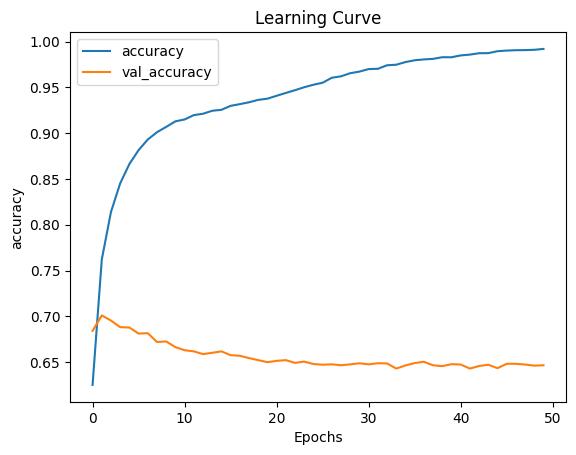

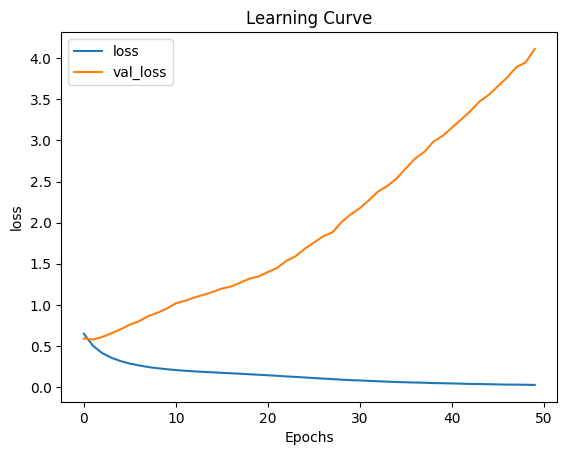

In [23]:
plot_grah(h, 'accuracy')
plot_grah(h, 'loss')

### Embedding Dim

In [24]:
# Pour le Embedding on prend la racine quatrième du vocab_size
np.power(vocab_size, 1/4)

13.049669101523763

In [16]:
vocab_size = 29000
embedding_dim = 13

tokenizer = Tokenizer(num_words=vocab_size, 
                     oov_token="<OOV>")

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sentences = tokenizer.texts_to_sequences(training_sentences)
test_sentences = tokenizer.texts_to_sequences(test_sentences)

training_padd = pad_sequences(training_sentences, 
              padding="post", 
              maxlen=15,
             truncating="post")
test_padd = pad_sequences(test_sentences, 
              padding="post", 
              maxlen=15,
             truncating="post")

training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),  # Attribuer 20 poids(caractéristiques(nombres)) à chacun des 20000 mots
        tf.keras.layers.GlobalAveragePooling1D(), # La moyenne pour chaque phrase
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        
    ]
)

model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model2.h5", 
                            # save_weights_only=True, 
                            monitor="val_accuracy", 
                            mode="max", 
                            save_best_only=True)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                       patience=3
                                       ) 

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

h = model.fit(training_padd, training_labels, epochs=50, 
              validation_data=(test_padd, test_labels),
             callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 7s 10ms/step - loss: 0.6574 - accuracy: 0.6393 - val_loss: 0.6052 - val_accuracy: 0.6800
Epoch 2/50
625/625 [==============================] - 6s 9ms/step - loss: 0.5199 - accuracy: 0.7548 - val_loss: 0.5750 - val_accuracy: 0.6962
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 0.4292 - accuracy: 0.8056 - val_loss: 0.5961 - val_accuracy: 0.6996
Epoch 4/50
625/625 [==============================] - 5s 8ms/step - loss: 0.3702 - accuracy: 0.8375 - val_loss: 0.6346 - val_accuracy: 0.6914
Epoch 5/50
625/625 [==============================] - 5s 8ms/step - loss: 0.3276 - accuracy: 0.8619 - val_loss: 0.6807 - val_accuracy: 0.6932
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2949 - accuracy: 0.8777 - val_loss: 0.7321 - val_accuracy: 0.6832
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2705 - accuracy: 0.8905 - val_loss: 0.7757 - val_accuracy: 0.6860
Epoch

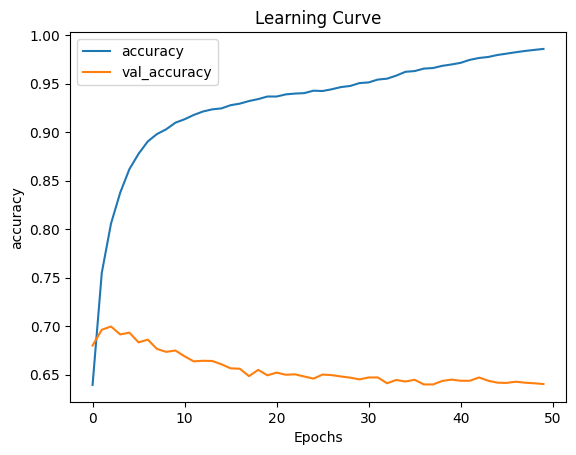

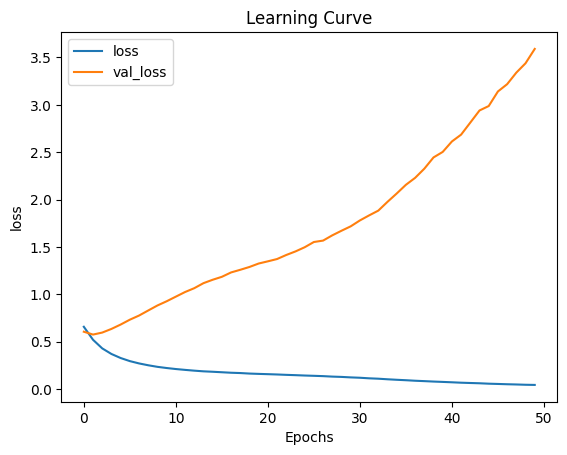

In [18]:
plot_grah(h, 'accuracy')
plot_grah(h, 'loss')

### Architecture du Modele

In [ ]:
# Ajouter une couche, l'optimizer, le au lieu de la moyenne une somme,

In [21]:
vocab_size = 29000
embedding_dim = 13

tokenizer = Tokenizer(num_words=vocab_size, 
                     oov_token="<OOV>")

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sentences = tokenizer.texts_to_sequences(training_sentences)
test_sentences = tokenizer.texts_to_sequences(test_sentences)

training_padd = pad_sequences(training_sentences, 
              padding="post", 
              maxlen=15,
             truncating="post")
test_padd = pad_sequences(test_sentences, 
              padding="post", 
              maxlen=15,
             truncating="post")

training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),  # Attribuer 20 poids(caractéristiques(nombres)) à chacun des 20000 mots
        tf.keras.layers.GlobalAveragePooling1D(), # La moyenne pour chaque phrase
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        
    ]
)

model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model2.h5", 
                            # save_weights_only=True, 
                            monitor="val_accuracy", 
                            mode="max", 
                            save_best_only=True)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                       patience=3
                                       ) 

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

h = model.fit(training_padd, training_labels, epochs=50, 
              validation_data=(test_padd, test_labels),
             callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 7s 10ms/step - loss: 0.6597 - accuracy: 0.6238 - val_loss: 0.6028 - val_accuracy: 0.6792
Epoch 2/50
625/625 [==============================] - 5s 9ms/step - loss: 0.5125 - accuracy: 0.7531 - val_loss: 0.5777 - val_accuracy: 0.6944
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 0.4235 - accuracy: 0.8109 - val_loss: 0.6028 - val_accuracy: 0.6962
Epoch 4/50
625/625 [==============================] - 5s 8ms/step - loss: 0.3650 - accuracy: 0.8413 - val_loss: 0.6475 - val_accuracy: 0.6920
Epoch 5/50
625/625 [==============================] - 6s 9ms/step - loss: 0.3227 - accuracy: 0.8633 - val_loss: 0.6965 - val_accuracy: 0.6858
Epoch 6/50
625/625 [==============================] - 5s 9ms/step - loss: 0.2905 - accuracy: 0.8802 - val_loss: 0.7447 - val_accuracy: 0.6878
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2666 - accuracy: 0.8921 - val_loss: 0.7959 - val_accuracy: 0.6780
Epoch

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 13)          377000    
                                                                 
 global_average_pooling1d_1   (None, 13)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 3)                 42        
                                                                 
 dense_3 (Dense)             (None, 5)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 377,068
Trainable params: 377,068
Non-trainable params: 0
________________________________________________

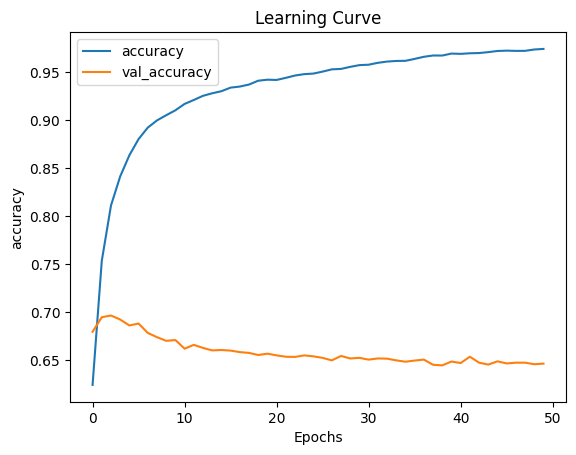

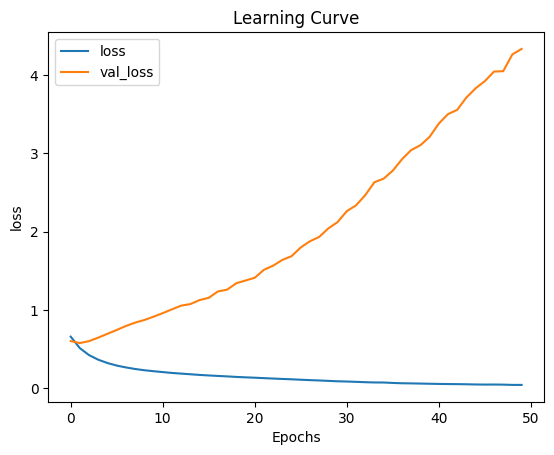

In [24]:
plot_grah(h, 'accuracy')
plot_grah(h, 'loss')

### Max Len(la taille d'une phrase) + Dropout

In [28]:
training_sentences[0]

'b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."'

In [31]:
taille = []

for sent in training_sentences:
    taille.append(len(sent.split(" ")))

In [33]:
np.array(taille).min(), np.array(taille).max(), np.array(taille).mean(), np.median(taille)

(10, 2470, 233.90165, 174.0)

In [34]:
vocab_size = 29000
embedding_dim = 13
maxlen = 100

tokenizer = Tokenizer(num_words=vocab_size, 
                     oov_token="<OOV>")

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sentences = tokenizer.texts_to_sequences(training_sentences)
test_sentences = tokenizer.texts_to_sequences(test_sentences)

training_padd = pad_sequences(training_sentences, 
              padding="post", 
              maxlen=maxlen,
             truncating="post")
test_padd = pad_sequences(test_sentences, 
              padding="post", 
              maxlen=maxlen,
             truncating="post")

training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),  # Attribuer 20 poids(caractéristiques(nombres)) à chacun des 20000 mots
        tf.keras.layers.GlobalAveragePooling1D(), # La moyenne pour chaque phrase
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        
    ]
)

model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model2.h5", 
                            # save_weights_only=True, 
                            monitor="val_accuracy", 
                            mode="max", 
                            save_best_only=True)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                       patience=3
                                       ) 

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

h = model.fit(training_padd, training_labels, epochs=50, 
              validation_data=(test_padd, test_labels),
             callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 7s 10ms/step - loss: 0.6368 - accuracy: 0.6363 - val_loss: 0.4812 - val_accuracy: 0.8014
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 0.4151 - accuracy: 0.8225 - val_loss: 0.3855 - val_accuracy: 0.8334
Epoch 3/50
625/625 [==============================] - 5s 9ms/step - loss: 0.3236 - accuracy: 0.8694 - val_loss: 0.3730 - val_accuracy: 0.8410
Epoch 4/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2721 - accuracy: 0.8987 - val_loss: 0.3882 - val_accuracy: 0.8348
Epoch 5/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2295 - accuracy: 0.9198 - val_loss: 0.4049 - val_accuracy: 0.8388
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 0.1962 - accuracy: 0.9330 - val_loss: 0.4482 - val_accuracy: 0.8346
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 0.1703 - accuracy: 0.9427 - val_loss: 0.4770 - val_accuracy: 0.8286
Epoch

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 13)          377000    
                                                                 
 global_average_pooling1d_2   (None, 13)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 5)                 70        
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_6 (Dense)             (None, 3)                 18        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                      

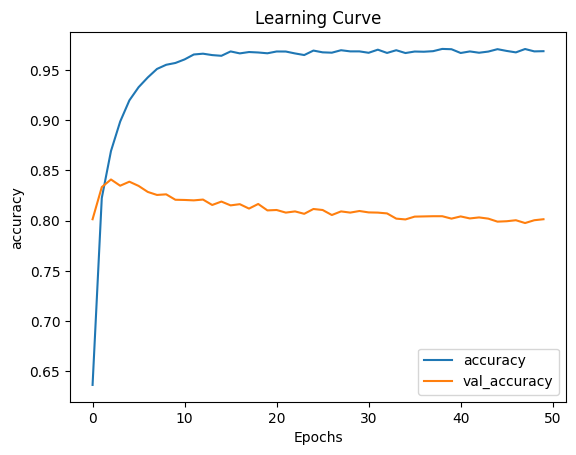

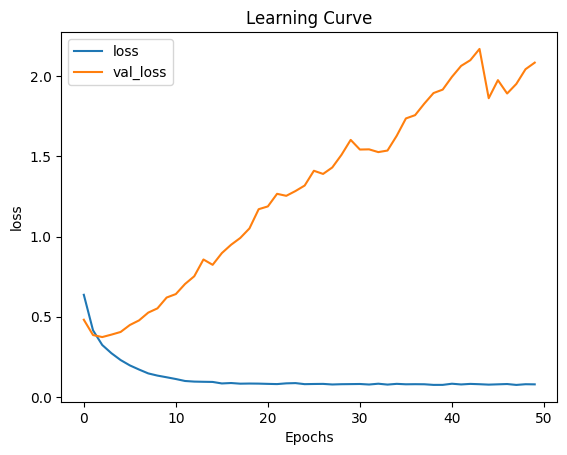

In [36]:
plot_grah(h, 'accuracy')
plot_grah(h, 'loss')

### Transfert Learning

In [37]:
# tensorflow.org/hub

In [38]:
import tensorflow_hub as hub

In [40]:
embed = hub.load("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1")
embeddings = embed(["cat is on the mat", "dog is in the fog"])

In [41]:
embeddings.shape

TensorShape([2, 20])

In [42]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1", output_shape=[20],
                           input_shape=[], dtype=tf.string)

In [49]:
train_data, test_data = tfds.load('imdb_reviews', 
                            split=['train', 'test'],
                           batch_size=-1,
                           as_supervised=True)

In [50]:
train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

training_sentences = test_examples[20000:]
training_labels = train_labels[20000:]

test_sentences = test_examples[:20000]
test_labels = train_labels[:20000]

In [52]:
model = tf.keras.models.Sequential(
    [
        hub_layer,
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        
    ]
)

model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model2.h5", 
                            # save_weights_only=True, 
                            monitor="val_accuracy", 
                            mode="max", 
                            save_best_only=True)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                       patience=3
                                       ) 

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

h = model.fit(training_sentences, training_labels, epochs=50, 
              validation_data=(test_sentences, test_labels),
             callbacks=[model_ckp])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Epoch 1/50
157/157 [==============================] - 4s 20ms/step - loss: 0.7861 - accuracy: 0.5016 - val_loss: 0.6954 - val_accuracy: 0.5023
Epoch 2/50
157/157 [==============================] - 3s 18ms/step - loss: 0.6962 - accuracy: 0.5028 - val_loss: 0.6937 - val_accuracy: 0.5036
Epoch 3/50
157/157 [==============================] - 3s 17ms/step - loss: 0.6946 - accuracy: 0.5086 - val_loss: 0.6936 - val_accuracy: 0.5005
Epoch 4/50
157/157 [==============================] - 3s 18ms/step - loss: 0.6958 - accuracy: 0.4982 - val_loss: 0.6937 - val_accuracy: 0.5037
Epoch 5/50
157/157 [==============================] - 3s 17ms/step - loss: 0.6933 - accuracy: 0.5028 - val_loss: 0.6936 - val_accuracy: 0.5002
Epoch 6/50
157/157 [==============================] - 3s 19ms/step - loss: 0.6938 - accuracy: 0.5060 - val_loss: 0.6934 - val_accuracy: 0.5047
Epoch 7/50
157/157 [==============================] - 3s 19ms/step - loss: 0.6939 - accuracy: 0.5126 - val_loss: 0.6934 - val_accuracy: 0.5009

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense_8 (Dense)             (None, 5)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_9 (Dense)             (None, 3)                 18        
                                                                 
 dense_10 (Dense)            (None, 1)                 4         
                                                                 
Total params: 400,147
Trainable params: 127
Non-trainable params: 400,020
_________________________________________________________________


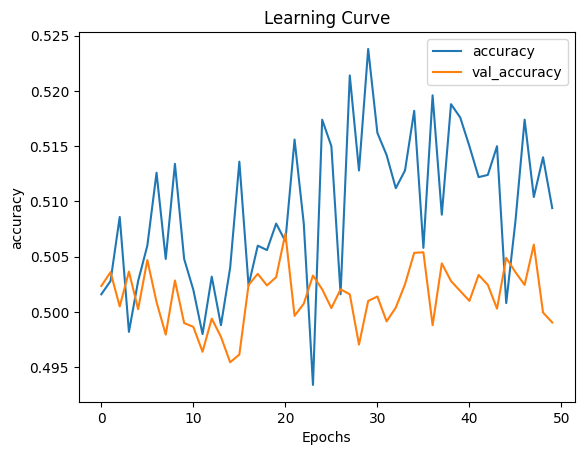

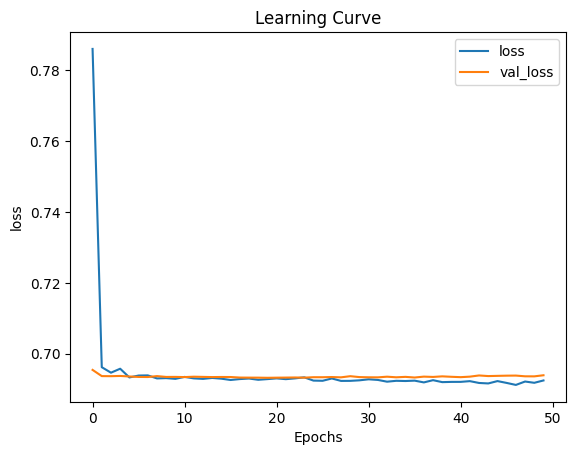

In [54]:
plot_grah(h, 'accuracy')
plot_grah(h, 'loss')